In [18]:
from scipy.spatial import distance_matrix

In [19]:
file_path = 'data.txt'

# Initialize lists to store vehicle and customer data
vehicle_data = []
customer_data = []

# Read data line by line
with open(file_path, 'r') as file:
    lines = file.readlines()
    
    # Parse vehicle data
    vehicle_info_start = lines.index('VEHICLE\n') + 2
    vehicle_info_end = lines.index('CUSTOMER\n')
    vehicle_line = lines[vehicle_info_start].strip().split()
    
    # Store vehicle data as a dictionary in a list
    vehicle_data.append({
        'NUMBER': int(vehicle_line[0]),
        'CAPACITY': int(vehicle_line[1])
    })
    
    # Parse customer data
    customer_info_start = vehicle_info_end + 2
    for line in lines[customer_info_start:]:
        if line.strip():  # Skip any empty lines
            parts = line.strip().split()
            customer_data.append({
                'CUST_NO': int(parts[0]),
                'XCOORD': int(parts[1]),
                'YCOORD': int(parts[2]),
                'DEMAND': int(parts[3]),
                'READY_TIME': int(parts[4]),
                'DUE_DATE': int(parts[5]),
                'SERVICE_TIME': int(parts[6])
            })

# Display the parsed data
print("Vehicle Data:")
print(vehicle_data)
print("\nCustomer Data:")
for customer in customer_data:  # Show first 5 customers for brevity
    print(customer)


Vehicle Data:
[{'NUMBER': 25, 'CAPACITY': 200}]

Customer Data:
{'CUST_NO': 0, 'XCOORD': 40, 'YCOORD': 50, 'DEMAND': 0, 'READY_TIME': 0, 'DUE_DATE': 1236, 'SERVICE_TIME': 0}
{'CUST_NO': 1, 'XCOORD': 45, 'YCOORD': 68, 'DEMAND': 10, 'READY_TIME': 912, 'DUE_DATE': 967, 'SERVICE_TIME': 90}
{'CUST_NO': 2, 'XCOORD': 45, 'YCOORD': 70, 'DEMAND': 30, 'READY_TIME': 825, 'DUE_DATE': 870, 'SERVICE_TIME': 90}
{'CUST_NO': 3, 'XCOORD': 42, 'YCOORD': 66, 'DEMAND': 10, 'READY_TIME': 65, 'DUE_DATE': 146, 'SERVICE_TIME': 90}
{'CUST_NO': 4, 'XCOORD': 42, 'YCOORD': 68, 'DEMAND': 10, 'READY_TIME': 727, 'DUE_DATE': 782, 'SERVICE_TIME': 90}
{'CUST_NO': 5, 'XCOORD': 42, 'YCOORD': 65, 'DEMAND': 10, 'READY_TIME': 15, 'DUE_DATE': 67, 'SERVICE_TIME': 90}
{'CUST_NO': 6, 'XCOORD': 40, 'YCOORD': 69, 'DEMAND': 20, 'READY_TIME': 621, 'DUE_DATE': 702, 'SERVICE_TIME': 90}
{'CUST_NO': 7, 'XCOORD': 40, 'YCOORD': 66, 'DEMAND': 20, 'READY_TIME': 170, 'DUE_DATE': 225, 'SERVICE_TIME': 90}
{'CUST_NO': 8, 'XCOORD': 38, 'YCOORD':

In [20]:
def nearest_neighbor_vrptw(dist_matrix, customer_data, start_city=0):
    """
    Nearest Neighbor heuristic for solving VRPTW.
    
    Parameters:
    - dist_matrix (numpy.ndarray): Distance matrix representing travel costs between cities.
    - customer_data (list[dict]): Each customer's time window info (READY_TIME, DUE_DATE).
    - start_city (int): Index of the starting city.
    
    Returns:
    - route (list): Order of cities visited.
    - total_distance (float): Total distance of the route.
    """
    num_cities = len(dist_matrix)
    visited = [False] * num_cities
    route = [start_city]
    total_distance = 0
    current_city = start_city
    visited[current_city] = True
    current_time = 0
    
    while False in visited:
        # Find the nearest unvisited city within time window constraints
        nearest_distance = float('inf')
        nearest_city = None
        
        for city in range(num_cities):
            if not visited[city]:
                arrival_time = current_time + dist_matrix[current_city, city]
                
                if (arrival_time >= customer_data[city]['READY_TIME'] and 
                    arrival_time <= customer_data[city]['DUE_DATE'] and 
                    dist_matrix[current_city, city] < nearest_distance):
                    
                    nearest_distance = dist_matrix[current_city, city]
                    nearest_city = city
        
        # Move to the nearest valid city
        if nearest_city is not None:
            route.append(nearest_city)
            total_distance += nearest_distance
            current_time += dist_matrix[current_city, nearest_city]
            # Wait if arriving early
            current_time = max(current_time, customer_data[nearest_city]['READY_TIME'])
            current_city = nearest_city
            visited[current_city] = True
        else:
            # No feasible city to visit
            print("No feasible city found. Ending early at",current_time)
            break
    
    # Return to the starting city, if feasible
    if current_time + dist_matrix[current_city, start_city] <= customer_data[start_city]['DUE_DATE']:
        total_distance += dist_matrix[current_city, start_city]
        route.append(start_city)
    else:
        print("Cannot return to start city within time window.")
    
    return route, total_distance


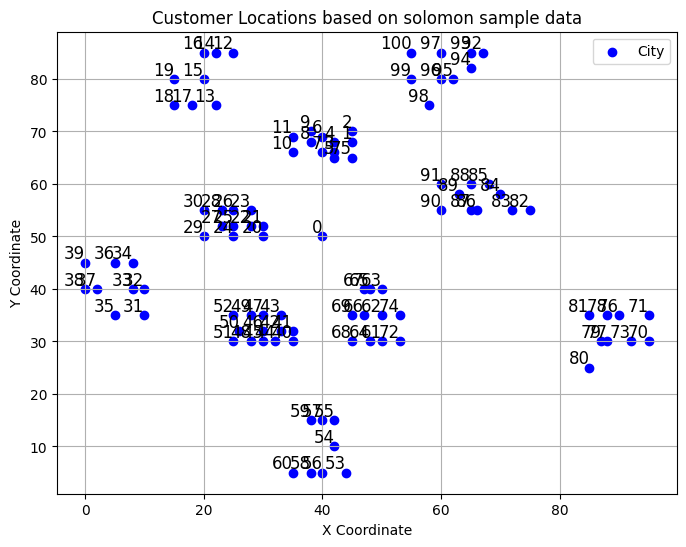

In [21]:
import numpy as np
import matplotlib.pyplot as plt
customer_locations = np.array([(customer['XCOORD'], customer['YCOORD']) for customer in customer_data])

# Step 2: Visualize the Cities
plt.figure(figsize=(8, 6))
plt.scatter(customer_locations[:, 0], customer_locations[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(customer_locations):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')
plt.title("Customer Locations based on solomon sample data")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

No feasible city found. Ending early at 953.3778780461117
Route: [0, 20, 43, 67, 90, 65, 42, 55, 33, 25, 7, 95, 62, 40, 27, 35, 29, 10, 15, 46, 72, 58, 28, 9, 14, 6, 26, 48, 59, 4, 99, 89, 22, 50, 66, 91, 21, 52, 69, 0]
Total Distance: 969.19


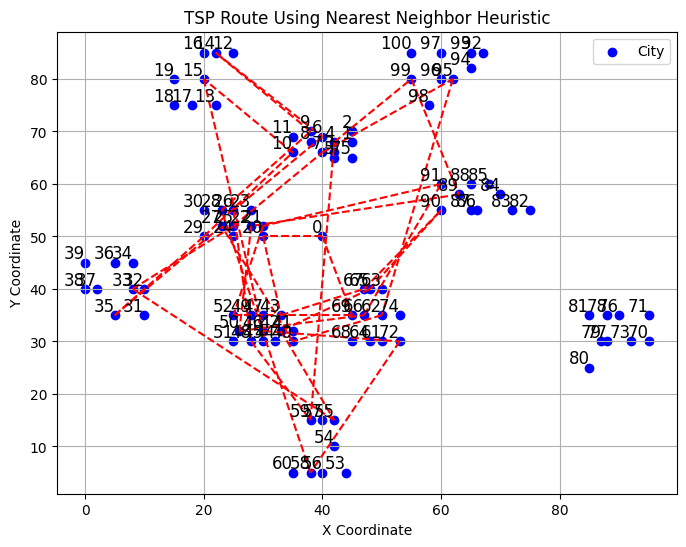

In [22]:
# Solve the TSP using the Nearest Neighbor heuristic
route, total_distance = nearest_neighbor_vrptw(distance_matrix(customer_locations, customer_locations),customer_data)

# Display the results
print(f"Route: {route}")
print(f"Total Distance: {total_distance:.2f}")

# Visualize the route
plt.figure(figsize=(8, 6))
plt.scatter(customer_locations[:, 0], customer_locations[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(customer_locations):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')

# Plot the route
for i in range(len(route) - 1):
    start, end = route[i], route[i + 1]
    plt.plot([customer_locations[start, 0], customer_locations[end, 0]], [customer_locations[start, 1], customer_locations[end, 1]], 'r--')


plt.title("TSP Route Using Nearest Neighbor Heuristic")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


In [23]:
def nearest_neighbor_vrptw_multi_vehicle(dist_matrix, customer_data, num_vehicles, start_city=0):
    """
    Nearest Neighbor heuristic for solving VRPTW with multiple vehicles.
    
    Parameters:
    - dist_matrix (numpy.ndarray): Distance matrix representing travel costs between cities.
    - customer_data (list[dict]): Each customer's time window info (READY_TIME, DUE_DATE).
    - num_vehicles (int): Number of vehicles available.
    - start_city (int): Index of the depot (starting city).
    
    Returns:
    - routes (list[list]): List of routes for each vehicle.
    - total_distance (float): Total distance traveled by all vehicles.
    """
    num_cities = len(dist_matrix)
    visited = [False] * num_cities
    visited[start_city] = True  # Depot is always considered visited
    routes = []
    total_distance = 0
    
    for vehicle in range(num_vehicles):
        # Initialize route for this vehicle
        route = [start_city]
        current_city = start_city
        current_time = 0
        route_distance = 0
        
        while False in visited:
            # Find the nearest unvisited city within time window constraints
            nearest_distance = float('inf')
            nearest_city = None
            
            for city in range(num_cities):
                if not visited[city]:
                    arrival_time = current_time + dist_matrix[current_city, city]
                    
                    if (arrival_time >= customer_data[city]['READY_TIME'] and 
                        arrival_time <= customer_data[city]['DUE_DATE'] and 
                        dist_matrix[current_city, city] < nearest_distance):
                        
                        nearest_distance = dist_matrix[current_city, city]
                        nearest_city = city
            
            # Move to the nearest valid city
            if nearest_city is not None:
                route.append(nearest_city)
                route_distance += nearest_distance
                current_time += dist_matrix[current_city, nearest_city]
                # Wait if arriving early
                current_time = max(current_time, customer_data[nearest_city]['READY_TIME'])
                current_city = nearest_city
                visited[current_city] = True
            else:
                # No feasible city found for this vehicle
                break
        
        # Return to the starting city (depot)
        route_distance += dist_matrix[current_city, start_city]
        route.append(start_city)
        routes.append(route)
        total_distance += route_distance

        # Check if all customers are visited
        if all(visited):
            break
    
    # Check for unvisited customers
    unvisited_customers = [i for i, v in enumerate(visited) if not v]
    if unvisited_customers:
        print("Warning: Some customers could not be visited:", unvisited_customers)
    
    return routes, total_distance


In [ ]:
# Solve the VRPTW with multiple vehicles using the Nearest Neighbor heuristic
routes, total_distance = nearest_neighbor_vrptw_multi_vehicle(
    dist_matrix=distance_matrix(customer_locations, customer_locations),
    customer_data=customer_data,
    num_vehicles=vehicle_data[0]['NUMBER']  # Use the number of vehicles from the data
)

# Display the results
print(f"Routes: {routes}")
print(f"Total Distance: {total_distance:.2f}")

# Visualize the routes
plt.figure(figsize=(10, 8))

# Plot customer locations
plt.scatter(customer_locations[:, 0], customer_locations[:, 1], c='blue', label='Customer')
plt.scatter(customer_locations[0, 0], customer_locations[0, 1], c='red', s=100, marker='*', label='Depot')

# Annotate each customer with its index
for i, (x, y) in enumerate(customer_locations):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')

# Define a set of colors for different vehicle routes
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
if len(colors) < len(routes):
    colors *= (len(routes) // len(colors) + 1)  # Extend colors if there are more vehicles

# Plot each route
for vehicle_id, route in enumerate(routes):
    route_color = colors[vehicle_id]
    for i in range(len(route) - 1):
        start, end = route[i], route[i + 1]
        plt.plot(
            [customer_locations[start, 0], customer_locations[end, 0]],
            [customer_locations[start, 1], customer_locations[end, 1]],
            f'{route_color}--',
            label=f'Vehicle {vehicle_id + 1}' if i == 0 else None  # Label only once per vehicle
        )

# Finalize the plot
plt.title("VRPTW Routes Using Nearest Neighbor Heuristic")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


NameError: name 'num_vehicles' is not defined